In [2]:
#importing the required libraries
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [26]:
#Loading the dataset using pandas
data=pd.read_csv(r"C:\Users\carfe\OneDrive\AI_ML_YT_Videos.csv")
data.head()

,Unnamed: 0,Channel,Title,PublishedDate,Views,Likes,Comments
0,0,Jeff Heaton,LSTM-Based Time Series with PyTorch (10.2),10/27/2023,764,45,1
1,1,Jeff Heaton,"Time Series Data Encoding for Deep Learning, P...",10/26/2023,530,31,1
2,2,Jeff Heaton,Bayesian Hyperparameter Optimization for PyTor...,10/25/2023,453,29,1
3,3,Jeff Heaton,Creating Certificates to Deploy PyInstaller Py...,10/17/2023,439,12,0
4,4,Jeff Heaton,How Should you Architect Your PyTorch Neural N...,10/12/2023,825,39,1


In [27]:
#Removing the unwanted columns in the dataset
data=data.drop(['Unnamed: 0'],axis=1)
data.head()


,Channel,Title,PublishedDate,Views,Likes,Comments
0,Jeff Heaton,LSTM-Based Time Series with PyTorch (10.2),10/27/2023,764,45,1
1,Jeff Heaton,"Time Series Data Encoding for Deep Learning, P...",10/26/2023,530,31,1
2,Jeff Heaton,Bayesian Hyperparameter Optimization for PyTor...,10/25/2023,453,29,1
3,Jeff Heaton,Creating Certificates to Deploy PyInstaller Py...,10/17/2023,439,12,0
4,Jeff Heaton,How Should you Architect Your PyTorch Neural N...,10/12/2023,825,39,1


In [8]:
#checking the data shape
data.shape

(6151, 6)

In [9]:
#checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6151 entries, 0 to 6150
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Channel        6151 non-null   object
 1   Title          6151 non-null   object
 2   PublishedDate  6151 non-null   object
 3   Views          6151 non-null   int64 
 4   Likes          6151 non-null   int64 
 5   Comments       6151 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 288.5+ KB


In [11]:
#checking if the data contains any null values
data.isna().sum()

Channel          0
Title            0
PublishedDate    0
Views            0
Likes            0
Comments         0
dtype: int64

In [12]:
#checking if any duplicate values in the data
duplicate_values=data.duplicated().sum()
print("duplicate values:",duplicate_values)

duplicate values: 0


In [29]:
#basic statistical analysis
data.describe()

,Views,Likes,Comments
count,6.151000e+03,6151.000000,6151.000000
mean,5.220895e+04,935.637132,72.171029
std,1.180318e+05,2243.596155,144.250349
min,0.000000e+00,0.000000,0.000000
25%,5.017500e+03,83.000000,7.000000
50%,1.660600e+04,313.000000,27.000000
75%,5.211650e+04,926.000000,80.000000
max,2.689040e+06,64750.000000,3478.000000


**Questions asked from the data:**

1. Identify and determine the youtube channel renowed for educational content on AI or data science.
2. Identify the most frequent occuring concepts in videos and list the top 10 with the highest repitition.
3. Identify and analyze the available options or features related to views in the dataset.
4. Compile a list of the top 10 youtube channels along with their respective views based on the dataset.
5. Identify the most viewed channel.
6. Analyze the dataset to find when the most videos were posted.
7. Identify the channel with the highest number of comments.
8. Compile a list of top 10 most viewed videos for both Sentdex and Krish Naik.

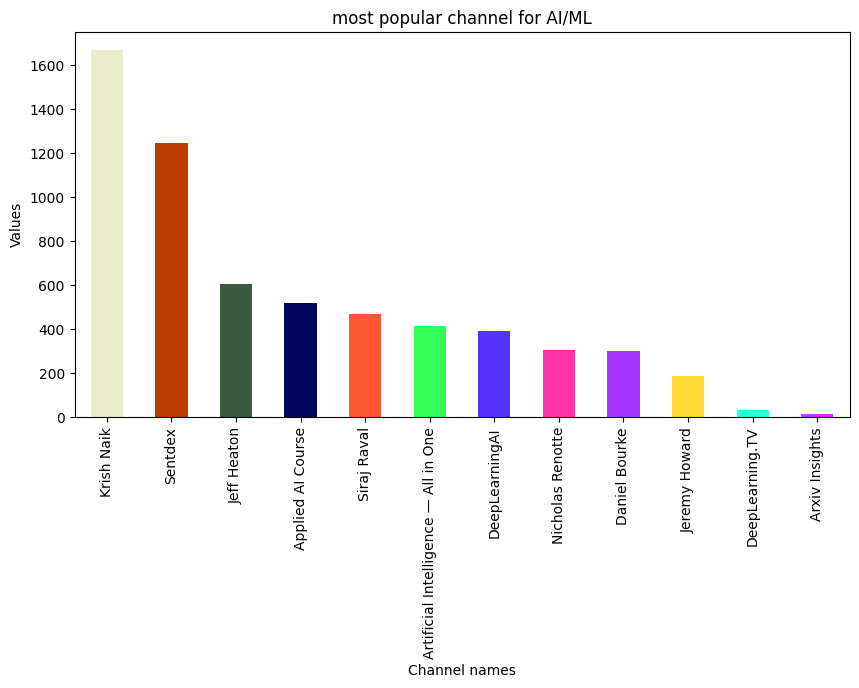

In [30]:
#Finding the most popular youtube channel
data['Channel'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), color=['#e9edc9', '#bb3e03', '#3a5a40', '#03045e', '#ff5733', '#33ff57', '#5733ff', '#ff33a8', '#a833ff', '#ffda33', '#33ffd1', '#d133ff'])

plt.title('most popular channel for AI/ML')
plt.xlabel("Channel names")
plt.ylabel("Values")
plt.show()

In [21]:
#Finding the most popular topics in the channel
pd.DataFrame(data['Title'].value_counts().head(10))

,count
Title,
Live Q&A Data Science,5
Kaggle Challenge (LIVE),3
Live Q&A- Ask Anything Related Data Science,3
Quantum Machine Learning (LIVE),3
LIVE: Machine Learning projects for your career transition (based on your current role),2
Are courses enough for a job? | Machine learning engineer livestream Q&A,2
Various Roles and Responsibilities in Data Science,2
The Trust That Binds,2
Introduction to PyTorch for Deep Learning with Python (3.2),2


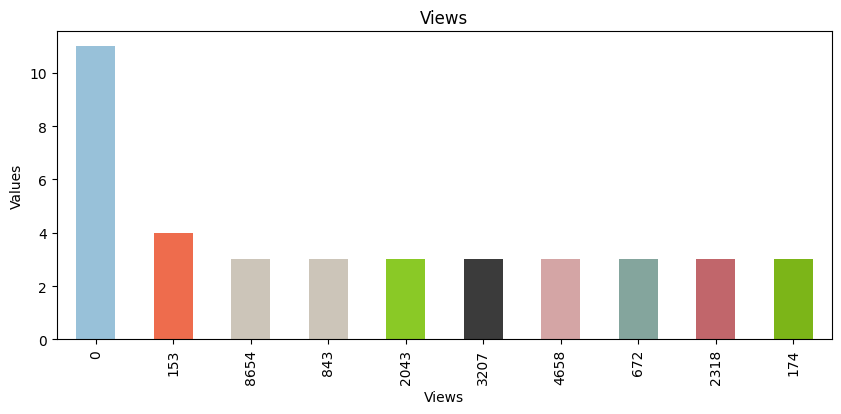

In [14]:
data['Views'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 4), color=['#98c1d9', '#ee6c4d', '#ccc5b9', '#ccc5b9', '#8ac926', '#3b3b3b', '#d4a5a5', '#84a59d', '#c1666b', '#7cb518'])

plt.title('Views')
plt.xlabel("Views")
plt.ylabel("Values")
plt.show()

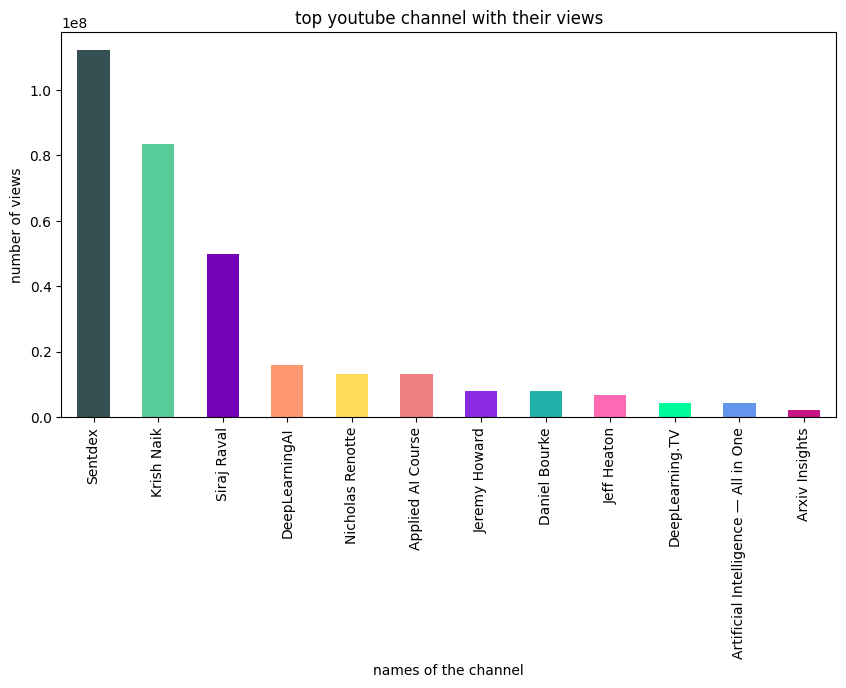

In [15]:
#Finding the most viewed youtube channel
data.groupby('Channel')['Views'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), color=['#354f52', '#7400b8', '#ff9770', '#ffdb58', '#f08080', '#8a2be2', '#20b2aa', '#ff69b4', '#00fa9a', '#6495ed', '#c71585'])

plt.title('top youtube channel with their views')
plt.xlabel("names of the channel")
plt.ylabel("number of views")
plt.show()

In [16]:
channel_views=pd.DataFrame(data.groupby('Channel')['Views'].sum().sort_values(ascending=False))
channel_views

,Views
Channel,
Sentdex,112159185
Krish Naik,83635593
Siraj Raval,49804096
DeepLearningAI,15875334
Nicholas Renotte,13255443
Applied AI Course,13194574
Jeremy Howard,7894444
Daniel Bourke,7857301
Jeff Heaton,6600032


In [17]:
#Creating a new column to find the most viewed channel
view_threshold = 50000000 
channel_views['channel_categories'] = channel_views['Views'].apply(lambda x: 'Most Viewed Channel' if x >= view_threshold else 'Less Viewed Channel')
channel_views


,Views,channel_categories
Channel,,
Sentdex,112159185,Most Viewed Channel
Krish Naik,83635593,Most Viewed Channel
Siraj Raval,49804096,Less Viewed Channel
DeepLearningAI,15875334,Less Viewed Channel
Nicholas Renotte,13255443,Less Viewed Channel
Applied AI Course,13194574,Less Viewed Channel
Jeremy Howard,7894444,Less Viewed Channel
Daniel Bourke,7857301,Less Viewed Channel
Jeff Heaton,6600032,Less Viewed Channel


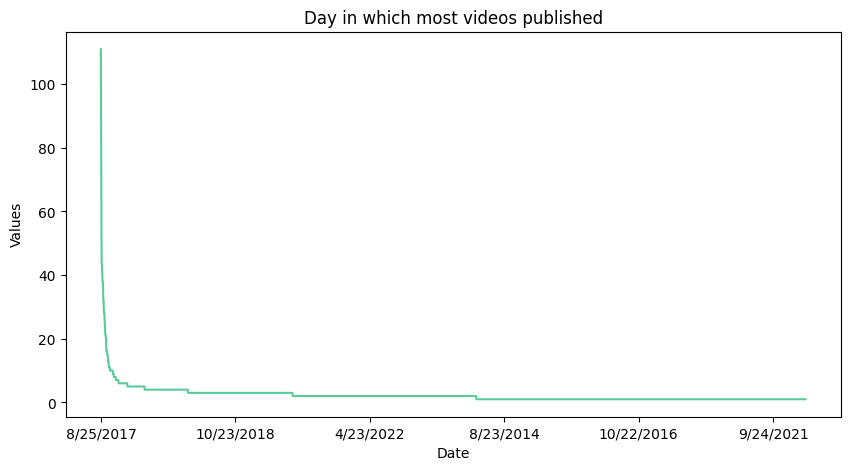

In [18]:
#finding the date in which most videos published
data['PublishedDate'].value_counts().plot(kind='line',figsize=(10,5),color=['#57cc99'])
plt.title('Day in which most videos published')
plt.xlabel("Date")
plt.ylabel("Values")
plt.show()

In [19]:
#Finding the top 10 videos based on views
top_10_most_watched_videos=pd.DataFrame(data.groupby('Title')['Views'].sum().sort_values(ascending=False))
top_10_most_watched_videos

,Views
Title,
AI VS ML VS DL VS Data Science,2689040
Practical Machine Learning Tutorial with Python Intro p.1,2665790
Complete Road Map To Be Expert In Python- Follow My Way,1640772
How To Learn Data Science Smartly?,1617866
Prakhar Raj Become Data Scientist at Simpl | Data Scientist Interview | Applied Ai Course Reviews,1605793
...,...
DeepLearning.TV Live Stream,0
Nicholas Renotte Live Stream,0
Quantum Machine Learning (LIVE),0


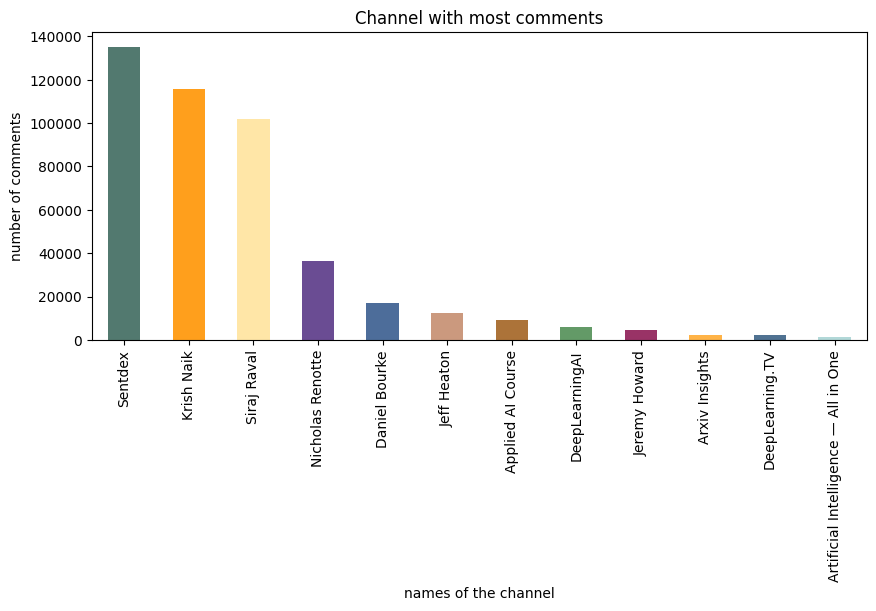

In [20]:
#Finding which channel has most comments
data.groupby('Channel')['Comments'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 4), color=['#52796f', '#ff9f1c', '#ffe6a7', '#6a4c93', '#4d6d9a', '#cb997e', '#ac7339', '#639a67', '#993366', '#ffb347', '#507292', '#b2d8d8'])

plt.title("Channel with most comments")
plt.xlabel("names of the channel")
plt.ylabel("number of comments")
plt.show()

In [21]:
top_10_comments=pd.DataFrame(data.groupby('Title')['Comments'].sum().sort_values(ascending=False))
top_10_comments

,Comments
Title,
Tensorflow Object Detection in 5 Hours with Python | Full Course with 3 Projects,3478
Real Time Sign Language Detection with Tensorflow Object Detection and Python | Deep Learning SSD,2603
My Apology,2031
Real Time Face Mask Detection with Tensorflow and Python | Custom Object Detection w/ MobileNet SSD,1808
AI VS ML VS DL VS Data Science,1697
...,...
"Introduction to Neural Networks for Java(Class 9/16, Part 2/3) selective pruning",0
"Introduction to Neural Networks for Java(Class 9/16, Part 1/3) pruning",0
Introduction to Neural Networks for Java(Class 6/16) xor and or,0


In [22]:
#Finding the most viewed videos of sentdex
sentdex=data['Channel']=='Sentdex'
most_viewed_videos_of_sentdex=pd.DataFrame(data.loc[sentdex].groupby('Title')['Views'].sum().sort_values(ascending=False))
most_viewed_videos_of_sentdex

,Views
Title,
Practical Machine Learning Tutorial with Python Intro p.1,2665790
Self driving car neural network in the city - Python plays GTA with Tensor Flow p.14,1573086
Regression Intro - Practical Machine Learning Tutorial with Python p.2,1391530
"Deep Learning with Python, TensorFlow, and Keras tutorial",1239057
Neural Networks from Scratch - P.1 Intro and Neuron Code,1221616
...,...
Basic PHP Tutorial 14: Foreach loop,401
Basic PHP Tutorial 9: While Loop,379
Basic PHP Programming Tutorial 25: Time and Time stamps,363


In [23]:
#Finding top 10 videos of Krish Naik
krish_naik=data['Channel']=='Krish Naik'
top_10_videos=pd.DataFrame(data.loc[krish_naik].groupby('Title')['Views'].sum().sort_values(ascending=False))
top_10_videos

,Views
Title,
AI VS ML VS DL VS Data Science,2689040
Complete Road Map To Be Expert In Python- Follow My Way,1640772
How To Learn Data Science Smartly?,1617866
OTT Platform For Education OneNeuron- Education As A Service,736171
Negotiating Salaries With HR for Any Job Is An Art. Learn IT Before It's Late 😭😭😭😭,701980
...,...
Thank You All For Sharing Your Knowledge,1767
Happy Diwali EveryOne- Motivation And Inspiration Is All We Need,1694
"CBSE to introduce artificial intelligence courses in classes 8, 9, 10",1443


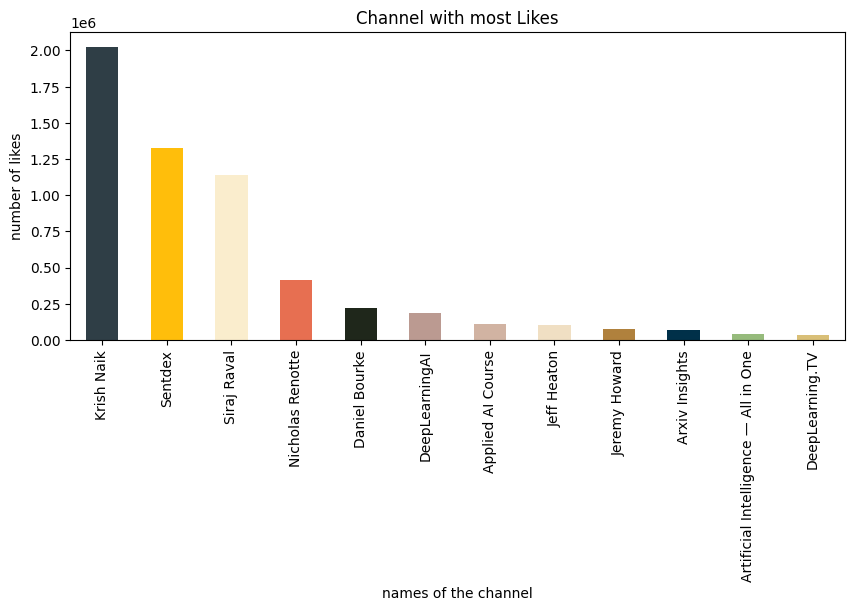

In [25]:
data.groupby('Channel')['Likes'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 4), color=['#2f3e46', '#ffbe0b', '#faedcd', '#e76f51', '#1f271b', '#bb9a91', '#d1b3a2', '#f0dfc3', '#b0813d', '#003049', '#96bb7c', '#d9bf77'])

plt.title("Channel with most Likes")
plt.xlabel("names of the channel")
plt.ylabel("number of likes")
plt.show()

**OBSERVATIONS**:

1. Sentdex and Krish Naik youtube channel have more followers compared to other channels.
2. Most videos are uploaded on 25 Aug 2017.
3. The video "AI VS ML VS Data Science" has the highest number of views.
4. Sentdex's channel has the highest number of comments, followed by Krish Naik.
5. The video "Tenserflow Object Detection in 5 hours with python" has the most comments.
6. In Sentdex's "practical machine learning tutorial with python intro p:1" video has the highest number of views.
7. In Krish Naik's "AI VS ML VS DL VS Data Science" video has the highest number of views
